In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd


plt.rcParams["font.family"] = "Arial"

%config InlineBackend.figure_format='retina'

In [2]:
T = 1 * 3600
tprime = 1 * 3600
n = 3

In [3]:
g = 9.81
a = 10000#km
h = 10000 #km
N = 0.01 #s^-1
Qmo = 2 #J kg^-1 s^-1

Qo = Qmo*(g/(273 * 1004)) #cp = 1004 J kg^-1 K^-1

l = n * np.pi / h #Vertical Wavenumber 

t = tprime + T

x = np.arange(0, 1000000, 1000)

In [4]:
f1 = np.arctan(((N * (T + tprime))/(l) + x)/a)
f2 = np.arctan(((N * (T + tprime))/(l) - x)/a)
f3 = np.arctan((x + (N * tprime)/(l))/a)
f4 = np.arctan((x - (N * tprime)/(l))/a)
f5 = 1/(1 + (((((N * (T + tprime))/l) + x) / a) ** 2))
f6 = 1/(1 + (((((N * (T + tprime))/l) - x) / a) ** 2))
f7 = 1/(1 + ((x + (N * tprime)/l)/a)**2)
f8 = 1/(1 + ((x - (N * tprime)/l)/a)**2)

In [5]:
# plt.plot(x, f1)
# plt.show()

# plt.plot(x, f2)
# plt.show()

# plt.plot(x, f3)
# plt.show()

# plt.plot(x, f4)
# plt.show()

# plt.plot(x, f5)
# plt.show()

# plt.plot(x, f6)
# plt.show()

# plt.plot(x, f7)
# plt.show()

# plt.plot(x, f8)
# plt.show()

In [6]:
def pressure(x, z, t): 
    p = - (Qo * a * np.cos(l * z))/N * (0.5) * (f1 + f2 + f3 + f4)
    return p

def thermal_buoyancy(x, z, t): 
    b = (Qo * a * l * np.sin(l * z))/N * (0.5) * (f1 + f2 - f3 + f4)
    return b

def zonal_velocity(x, z, t): 
    u = (Qo * a * l * np.cos(l * z))/N**2 * (0.5) * (f1 - f2 - f3 - f4)
    return u

def vertical_velocity(x, z, t): 
    w = - (Qo * np.sin(l * z)) / N**2 * (0.5) * (f5 + f6 - f7 - f8)
    return w

In [7]:
pressure_all = pd.DataFrame()
buoyancy_all = pd.DataFrame()
zonal_all = pd.DataFrame()
w_all = pd.DataFrame()

for i in range(np.arange(0, 10100, 100).shape[0]):
    height = np.arange(0, 10100, 100)[i]
        
    pressure_height_subset = pd.DataFrame(pressure(x, height, t))
    pressure_all = pd.concat([pressure_all, pressure_height_subset], ignore_index = True, axis = 1)
    
    buoyancy_subset = pd.DataFrame(thermal_buoyancy(x, height, t))
    buoyancy_all = pd.concat([buoyancy_all, buoyancy_subset], ignore_index = True, axis = 1)
    
    zonal_subset = pd.DataFrame(zonal_velocity(x, height, t))
    zonal_all = pd.concat([zonal_all, zonal_subset], ignore_index = True, axis = 1)
    
    w_subset = pd.DataFrame(vertical_velocity(x, height, t))
    w_all = pd.concat([w_all, w_subset], ignore_index = True, axis = 1)

In [8]:
height_all = pd.concat([pd.DataFrame(np.arange(0, 10100, 100))] * pressure_all.shape[0], ignore_index = True, axis = 1).T
distance_all = pd.concat([pd.DataFrame(x)] * pressure_all.shape[1], ignore_index = True, axis = 1)

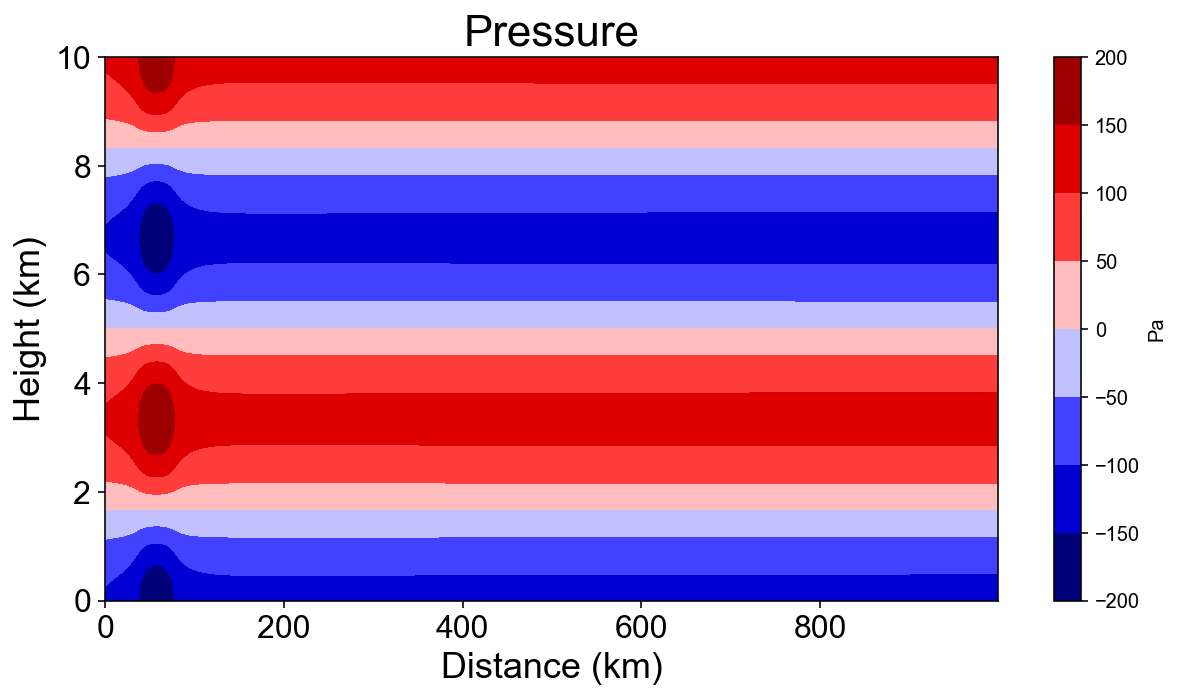

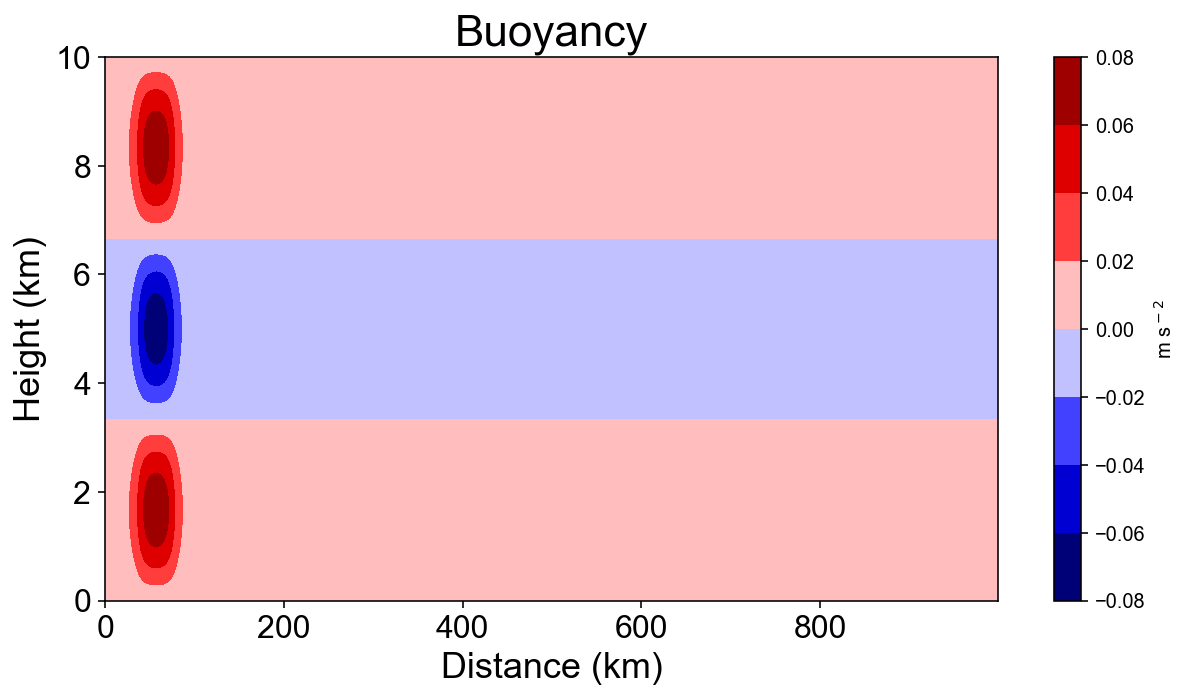

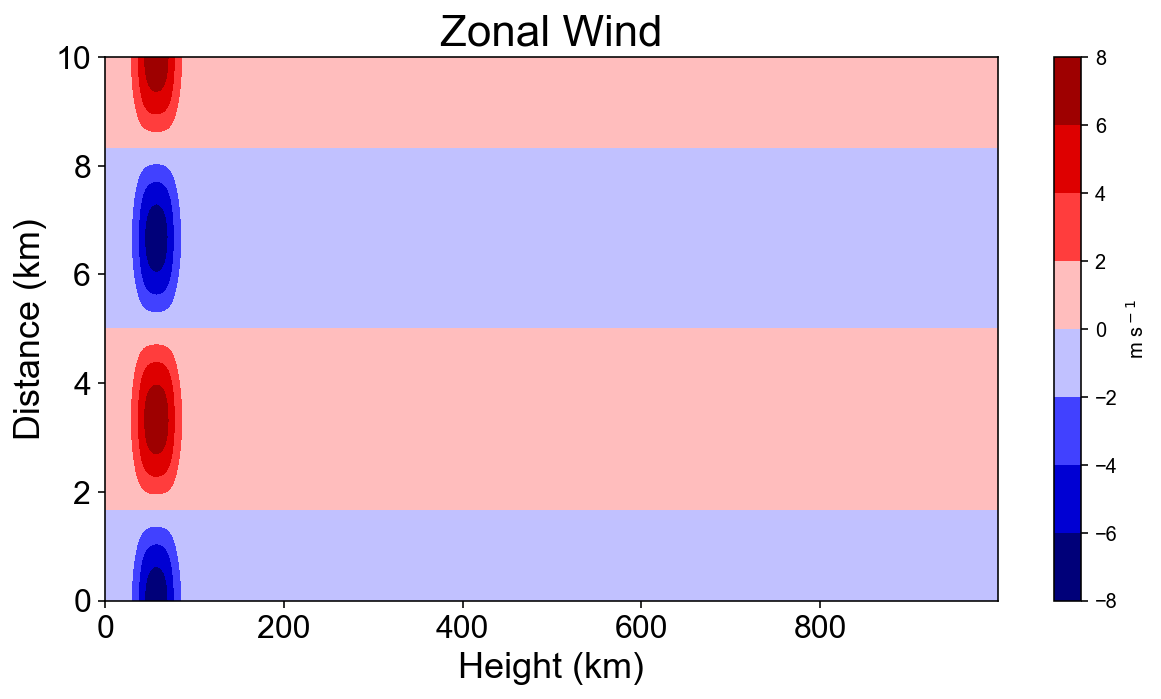

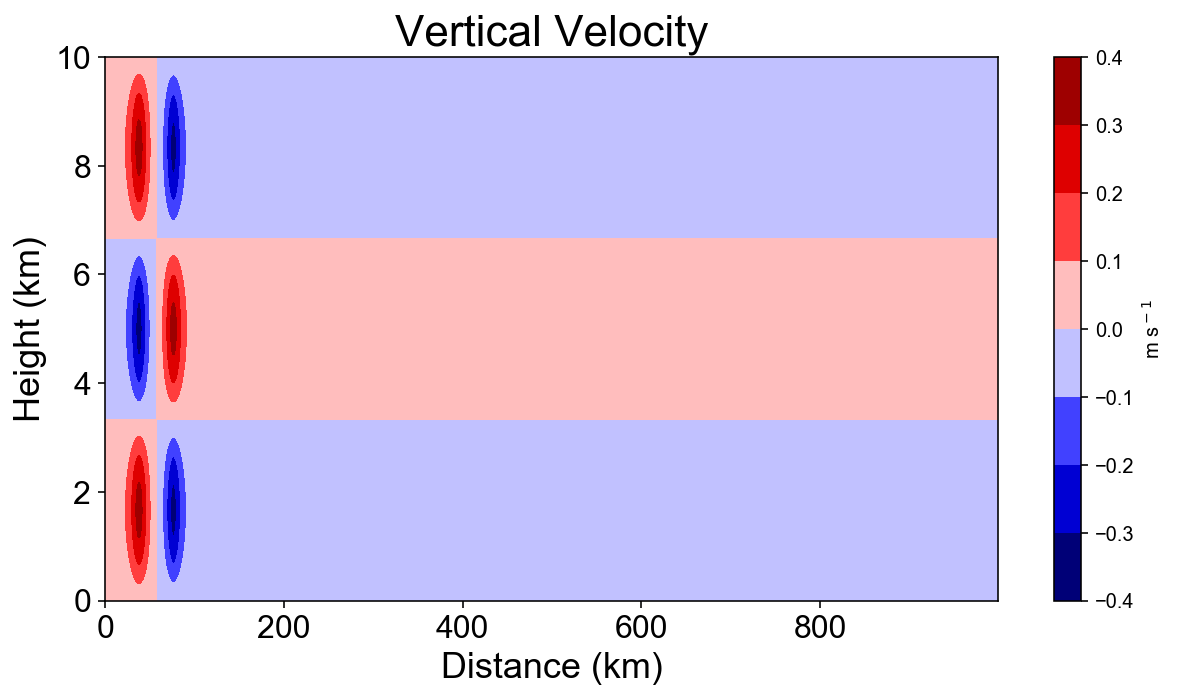

In [9]:
plt.figure(figsize = (10, 5))
plt.contourf(distance_all/1000, height_all/1000, pressure_all, cmap = 'seismic')
plt.colorbar(label = 'Pa')

plt.ylabel('Height (km)', fontsize = 18)
plt.xlabel('Distance (km)', fontsize = 18)
plt.tick_params(labelsize = 16)
plt.title('Pressure', fontsize = 22)
plt.show()


plt.figure(figsize = (10, 5))
plt.contourf(distance_all/1000, height_all/1000, buoyancy_all, cmap = 'seismic')
plt.colorbar(label = 'm s$^-$$^2$')

plt.ylabel('Height (km)', fontsize = 18)
plt.xlabel('Distance (km)', fontsize = 18)
plt.tick_params(labelsize = 16)
plt.title('Buoyancy', fontsize = 22)
plt.show()


plt.figure(figsize = (10, 5))
plt.contourf(distance_all/1000, height_all/1000, zonal_all, cmap = 'seismic')
plt.colorbar(label = 'm s$^-$$^1$')

plt.xlabel('Height (km)', fontsize = 18)
plt.ylabel('Distance (km)', fontsize = 18)
plt.tick_params(labelsize = 16)
plt.title('Zonal Wind', fontsize = 22)
plt.show()


plt.figure(figsize = (10, 5))
plt.contourf(distance_all/1000, height_all/1000, w_all, cmap = 'seismic')
plt.colorbar(label = 'm s$^-$$^1$')

plt.ylabel('Height (km)', fontsize = 18)
plt.xlabel('Distance (km)', fontsize = 18)
plt.tick_params(labelsize = 16)
plt.title('Vertical Velocity', fontsize = 22)
plt.show()